In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import splitfolders
import tensorflow as tf
import os

from matplotlib import pyplot as plt
import seaborn as sns

from keras_preprocessing.image import ImageDataGenerator

# Data Collecting

Dataset berupa gambar Kucing dan Anjing

Sumber Dataset = <a href="https://www.kaggle.com/datasets/erkamk/cat-and-dog-images-dataset">cat-and-dog-images-dataset</a> Kaggle

Total gambar keseluruhan : 1000 gambar Ditambah 10000 = 11000 Gambar kucing dan anjing


# Data Preprocessing

In [3]:
dataset_dir = r'./Dog and Cat .png'

In [4]:
splitfolders.ratio(dataset_dir, output="dataset-split", ratio=(0.8,0.1,0.1))


In [5]:
train_dir = r'dataset-split\train'
test_dir = r'dataset-split\test'
val_dir = r'dataset-split\val'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.01
    )

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    classes=['Cat','Dog'],
    class_mode='categorical',
    subset='training'
    )

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250), 
    classes=['Cat','Dog'],        
    class_mode='categorical', 
    shuffle=False
)

val_generator =  val_datagen.flow_from_directory(
    val_dir, 
    target_size=(250,250), 
    classes=['Cat','Dog'],
    class_mode='categorical',
    )

Found 792 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Data Visualization
Berikut  tampilan klasifikasi berupa grafik batang agar data lebih sederhana untuk Dilihat.

In [18]:
labels = ['Cat', 'Dog']

In [19]:
image, label = train_generator.next()

(32, 250, 250, 3)


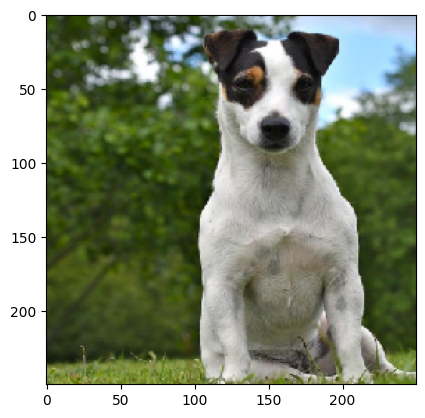

(32, 250, 250, 3)


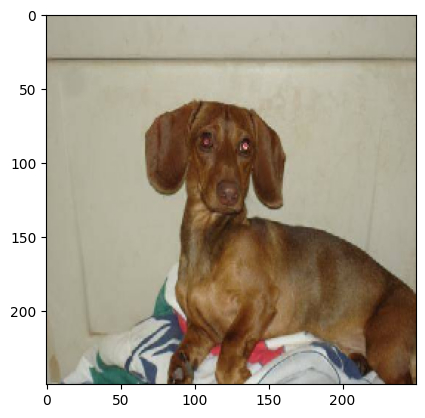

(32, 250, 250, 3)


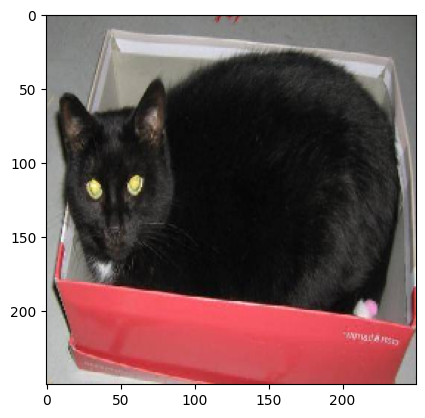

(32, 250, 250, 3)


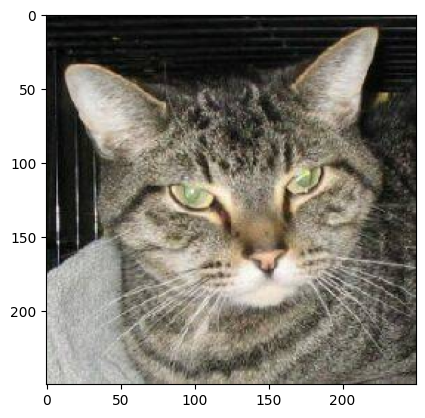

(32, 250, 250, 3)


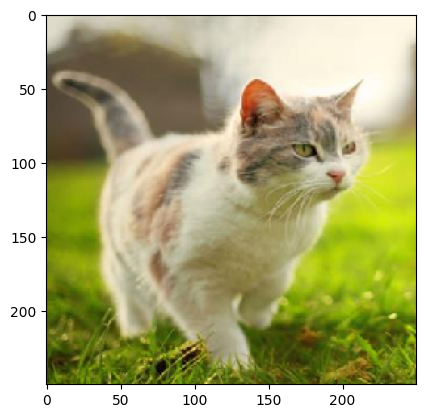

In [20]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

Tampilan beberapa gambar berdasarkan jenisnya

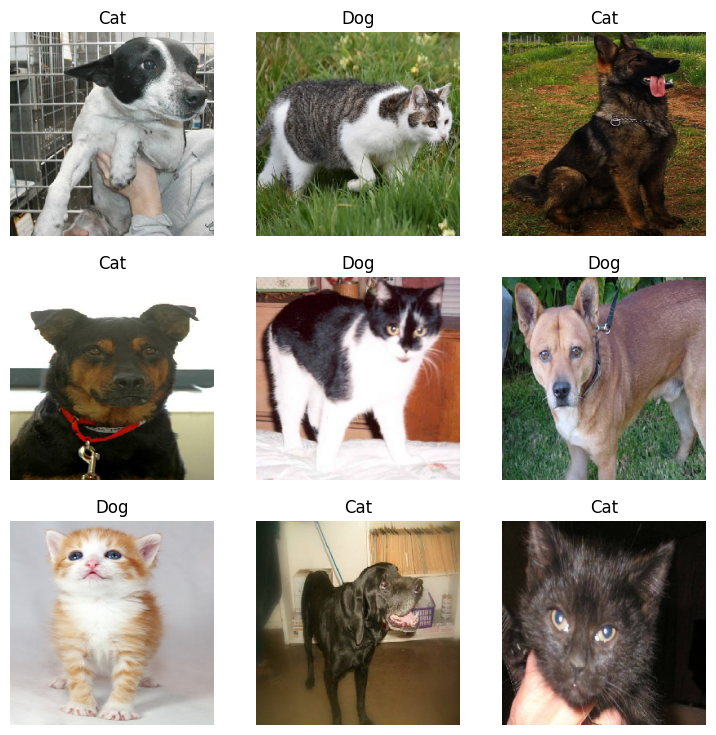

In [30]:
plt.figure(figsize=(9,9))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

## Visualisasi Jumlah Gambar Keseluruhan Data

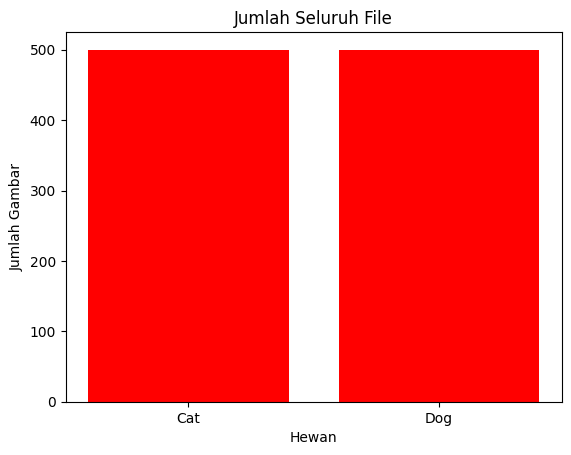

In [28]:
Jumlah_file = []

for jenis in os.listdir(dataset_dir):
    jenis_file = os.listdir(os.path.join(dataset_dir, jenis))
    banyaknya_file = len(jenis_file)
    Jumlah_file.append(banyaknya_file)

x = labels
y = Jumlah_file

plt.bar(x, y, color='red')
plt.title('Jumlah Seluruh File')
plt.xlabel('Hewan')
plt.ylabel('Jumlah Gambar')
plt.show()

## Visualisasi Jumlah Gambar Keseluruhan Data Training

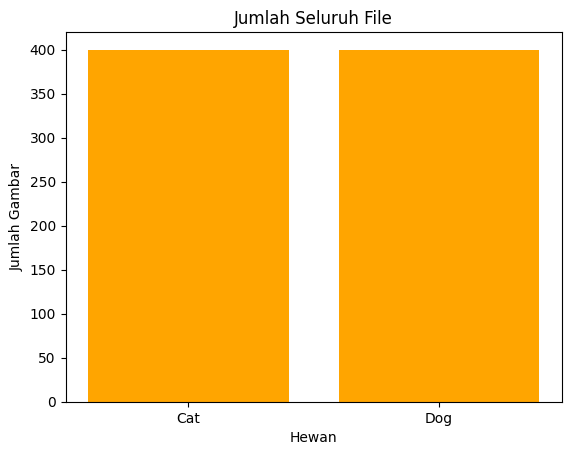

In [12]:
Jumlah_file_Train = []

for jenis in os.listdir(train_dir):
    jenis_file = os.listdir(os.path.join(train_dir, jenis))
    banyaknya_file = len(jenis_file)
    Jumlah_file_Train.append(banyaknya_file)

x = labels
y = Jumlah_file_Train

plt.bar(x, y, color='Orange')
plt.title('Jumlah Seluruh File')
plt.xlabel('Hewan')
plt.ylabel('Jumlah Gambar')
plt.show()

## Visualisasi Jumlah Gambar Keseluruhan Data Validasi

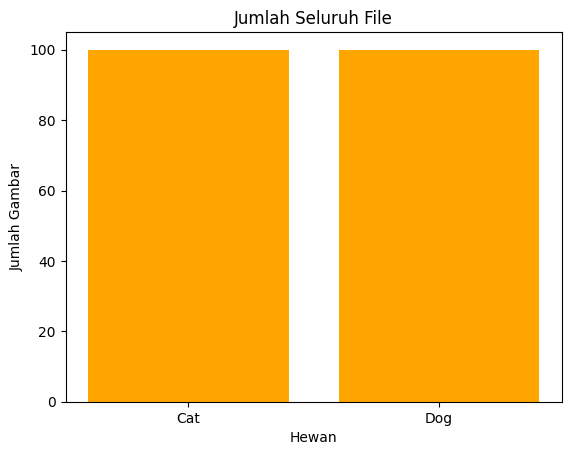

In [14]:
Jumlah_file_Val= []

for jenis in os.listdir(val_dir):
    jenis_file = os.listdir(os.path.join(val_dir, jenis))
    banyaknya_file = len(jenis_file)
    Jumlah_file_Val.append(banyaknya_file)

x = labels
y = Jumlah_file_Val

plt.bar(x, y, color='Orange')
plt.title('Jumlah Seluruh File')
plt.xlabel('Hewan')
plt.ylabel('Jumlah Gambar')
plt.show()

## Visualisasi Jumlah Gambar Keseluruhan Data Testing

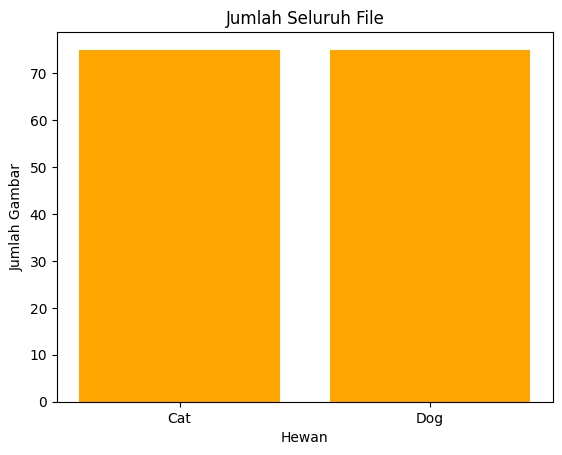

In [13]:
Jumlah_file_Test= []

for jenis in os.listdir(test_dir):
    jenis_file = os.listdir(os.path.join(test_dir, jenis))
    banyaknya_file = len(jenis_file)
    Jumlah_file_Test.append(banyaknya_file)

x = labels
y = Jumlah_file_Test

plt.bar(x, y, color='Orange')
plt.title('Jumlah Seluruh File')
plt.xlabel('Hewan')
plt.ylabel('Jumlah Gambar')
plt.show()

Melihat jumlah Gambar beserta ukurannya yang sudah ditentukan batch dan target size pada saat membuat Generator

In [15]:
len(image)

32

In [16]:
print(image.shape)

(32, 250, 250, 3)
